In [2]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
  Using cached librosa-0.10.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached numba-0.58.1.tar.gz (2.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [21 lines of output]
  Traceback (most recent call last):
    File "C:\Users\banda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\banda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\banda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_

Sampling rate of audio 1: 22050 Hz
Sampling rate of audio 2: 22050 Hz
Spectral Centroid 1: [[1830.11678343 1447.42616819 1516.08288902 1331.25098931 1259.85906017]]
Spectral Centroid 2: [[ 713.22186228  870.16071383 1027.67790467 1021.95989977  969.54507142]]
Spectral Bandwidth 1: [[2548.52768848 1647.82724352 1537.59327923 1326.50496515 1167.18850138]]
Spectral Bandwidth 2: [[1233.85601627 1344.42169705 1463.65358307 1452.18960632 1359.44782002]]
RMS Energy 1: [[1.6521171e-05 3.2499114e-03 1.1030196e-02 1.7636672e-02 2.2383844e-02]]
RMS Energy 2: [[0.03034843 0.04202622 0.0493762  0.05286257 0.05385945]]


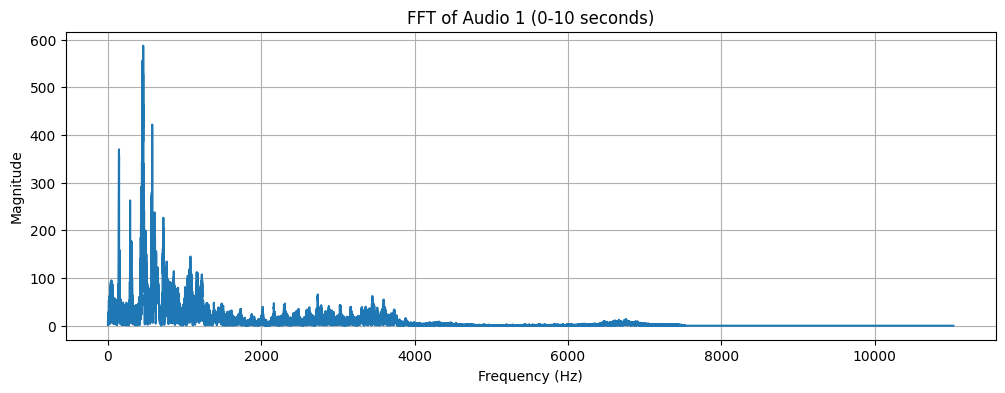

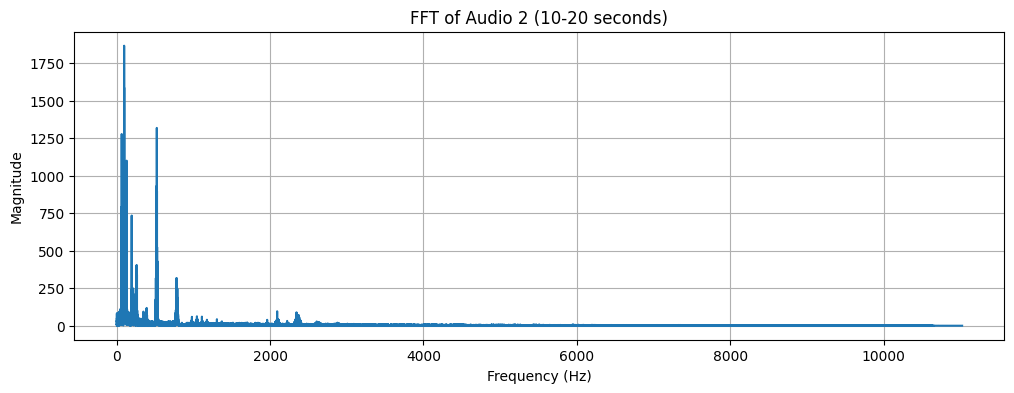

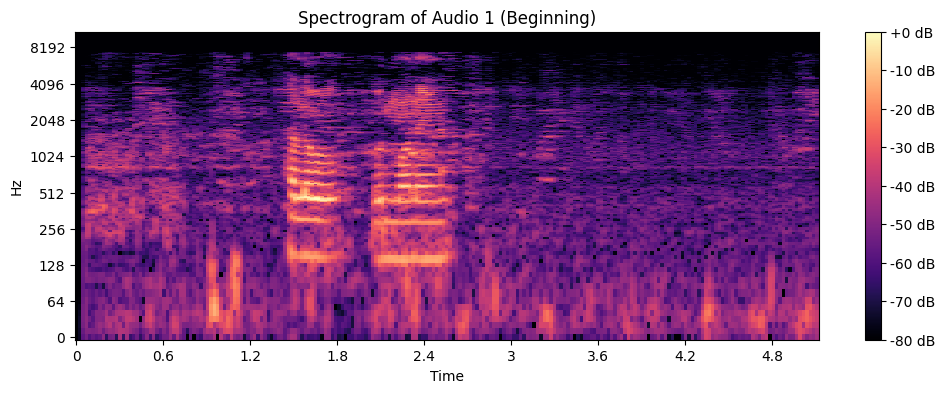

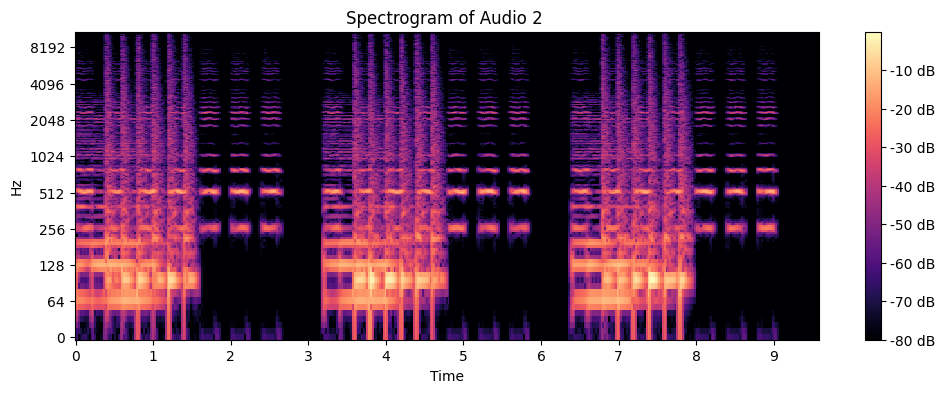

In [18]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
# Load audio files (replace 'song1.mp3', 'song2.mp3', etc., with your file paths)
audio_file1 = "Recording.wav"
audio_file2 = "Recording2.wav"

# Load audio and get sampling rate
audio1, sr1 = librosa.load(audio_file1)
audio2, sr2 = librosa.load(audio_file2)

# Display sampling rate
print(f"Sampling rate of audio 1: {sr1} Hz")
print(f"Sampling rate of audio 2: {sr2} Hz")

# Calculate and display spectral features
spectral_centroid1 = librosa.feature.spectral_centroid(y=audio1, sr=sr1)
spectral_centroid2 = librosa.feature.spectral_centroid(y=audio2, sr=sr2)

spectral_bandwidth1 = librosa.feature.spectral_bandwidth(y=audio1, sr=sr1)
spectral_bandwidth2 = librosa.feature.spectral_bandwidth(y=audio2, sr=sr2)

rms_energy1 = librosa.feature.rms(y=audio1)
rms_energy2 = librosa.feature.rms(y=audio2)

# Print the first 5 values of each feature
print("Spectral Centroid 1:", spectral_centroid1[:, :5])
print("Spectral Centroid 2:", spectral_centroid2[:, :5])

print("Spectral Bandwidth 1:", spectral_bandwidth1[:, :5])
print("Spectral Bandwidth 2:", spectral_bandwidth2[:, :5])

print("RMS Energy 1:", rms_energy1[:, :5])
print("RMS Energy 2:", rms_energy2[:, :5])
# Function to plot FFT of a 10-second segment
def plot_fft(audio, sr, start_time, end_time, title):
    start_sample = int(start_time * sr)
    end_sample = int(end_time * sr)
    segment = audio[start_sample:end_sample]

    fft_result = np.fft.fft(segment)
    magnitude = np.abs(fft_result)
    frequency = np.fft.fftfreq(len(magnitude), 1 / sr)

    plt.figure(figsize=(12, 4))
    plt.plot(frequency[:len(frequency) // 2], magnitude[:len(magnitude) // 2])
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

# Plot FFT of 10-second segments for audio 1 and audio 2
plot_fft(audio1, sr1, 0, 10, "FFT of Audio 1 (0-10 seconds)")
plot_fft(audio2, sr2, 0, 10, "FFT of Audio 2 (10-20 seconds)")
# Function to plot spectrogram
def plot_spectrogram(audio, sr, title):
    plt.figure(figsize=(12, 4))
    spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.show()

# Plot spectrogram for audio 1 at the beginning, middle, and 5 seconds before the end
duration = len(audio1) / sr1

plot_spectrogram(audio1, sr1, "Spectrogram of Audio 1 (Beginning)")
plot_spectrogram(audio2, sr1, "Spectrogram of Audio 2 ")
